In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI

In [47]:
def TC(T):
 # converts K to C
    TC = T - 273.15
    return TC

In [48]:
def TK(T):
 # converts C to K
    TK = T + 273.15
    return TK

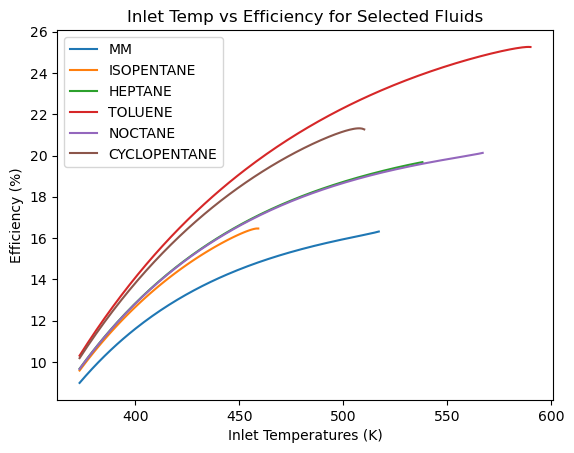

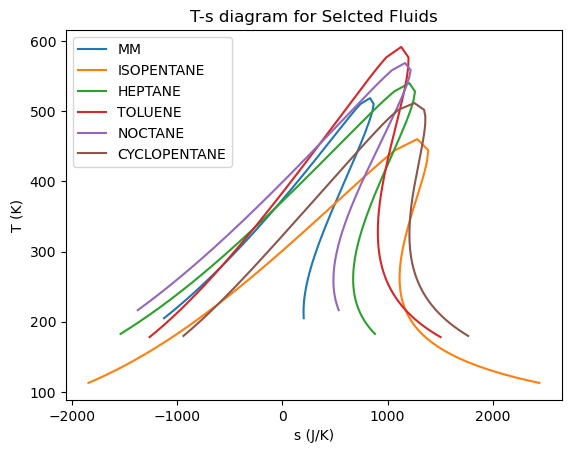

the efficiency is 16.345309932768988 percent
pump work:  0.603291594344104  kW/kg
turbine work:  75.74785209079337  kW/kg


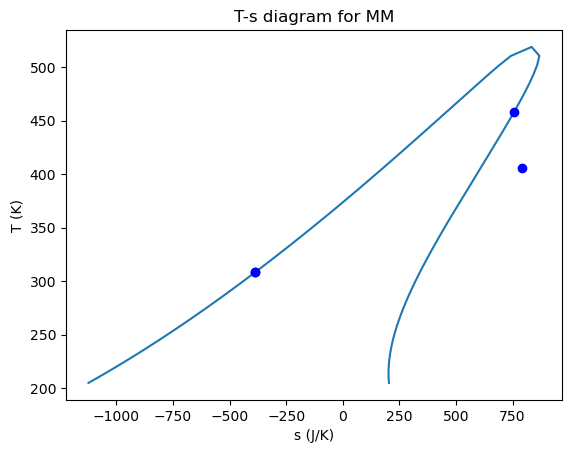

the efficiency is 18.28855845288283 percent
pump work:  3.361081668193616  kW/kg
turbine work:  97.71883048561745  kW/kg


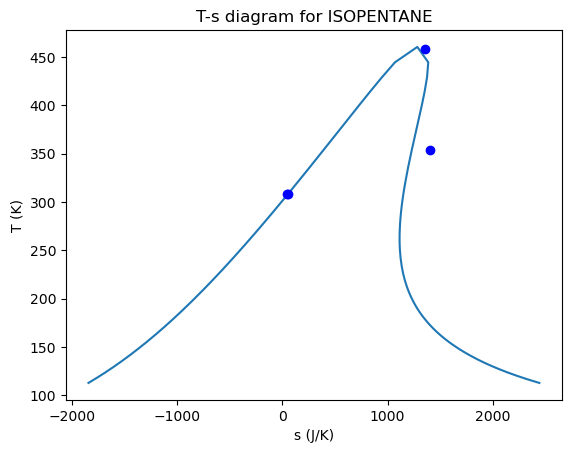

the efficiency is 18.89743412282727 percent
pump work:  0.7178420785736235  kW/kg
turbine work:  120.33173497364862  kW/kg


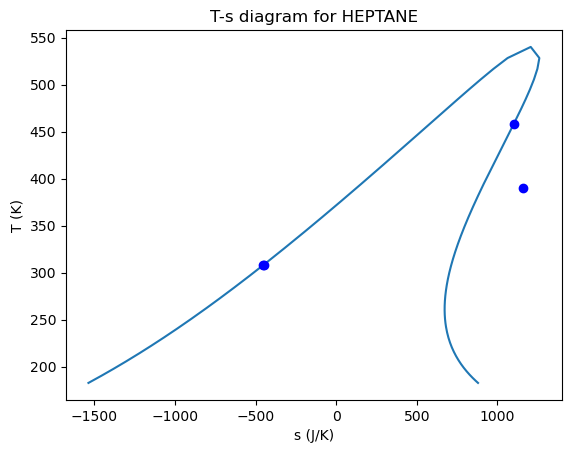

the efficiency is 21.84831116359613 percent
pump work:  0.4291696224521147  kW/kg
turbine work:  132.71594358599506  kW/kg


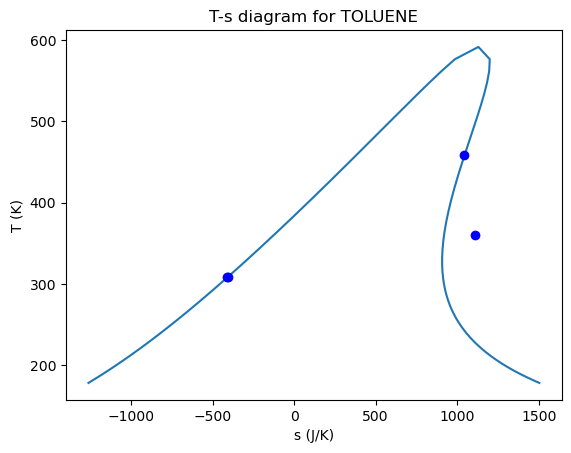

the efficiency is 18.85643478975092 percent
pump work:  0.38462661414980537  kW/kg
turbine work:  121.57680600707465  kW/kg


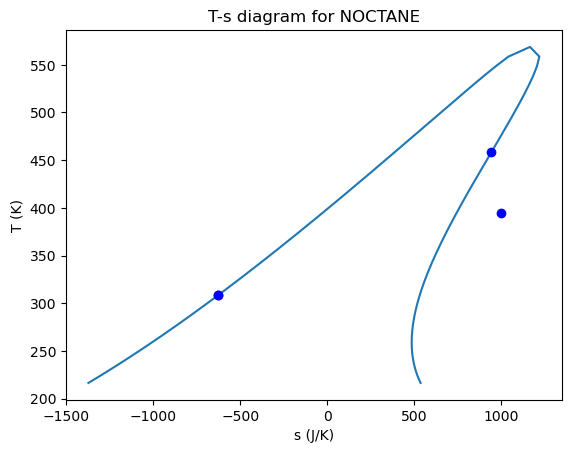

the efficiency is 21.120018339809086 percent
pump work:  1.820633443419938  kW/kg
turbine work:  125.62915250178159  kW/kg


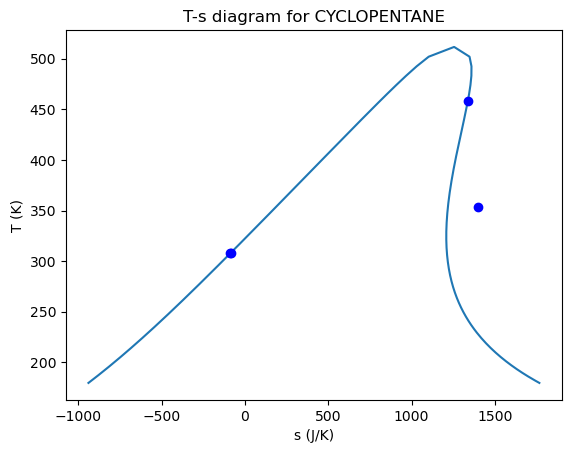

In [86]:
# our driver function
T1 = 185 #temp into the turbine estimate in C
T3 = 35 #temp out of condenser also an estimate in C
Fluids = ['MM', 'ISOPENTANE', 'HEPTANE','TOLUENE','NOCTANE','CYCLOPENTANE']

plt.figure()
for F in Fluids:
    inlet_temperatures, efficiencies = efficiencyPlot(F)
    plt.plot(inlet_temperatures, efficiencies,label=F)
plt.xlabel("Inlet Temperatures (K)")
plt.ylabel("Efficiency (%)")
plt.title('Inlet Temp vs Efficiency for Selected Fluids')
plt.legend()
plt.show()

plt.figure()
for F in Fluids:
    T_vals, s_vals, combined_temps, combined_entropies = runCycle(T1,T3,F,False) # boolean True gives the work and efficiency calcs
    plt.plot(combined_entropies, combined_temps,label=F)
plt.xlabel("s (J/K)")
plt.ylabel("T (K)")
plt.title('T-s diagram for Selcted Fluids')
plt.legend()
plt.show()

for F in Fluids:
    T_vals, s_vals, combined_temps, combined_entropies = runCycle(T1,T3,F,True)
    plt.plot(combined_entropies, combined_temps,label=F)
    plt.plot(s_vals, T_vals,'o',color='b')
    plt.xlabel("s (J/K)")
    plt.ylabel("T (K)")
    plt.title('T-s diagram for '+F)
    plt.show()


In [77]:
def efficiencyPlot(F):
    inlet_temperatures = []
    efficiencies = []
    highT = math.floor(TC(PropsSI('Tcrit', F)))
    
    for T1 in range(100,highT):
        inlet_temperatures.append(TK(T1))
        P1 = PropsSI('P','T|gas',TK(T1),'Q',1, F)#saturated vapor for a dry fluid, units Pa
        s1 = PropsSI('S','T|gas',TK(T1),'P',P1, F)
        h1 = PropsSI('H','T|gas',TK(T1),'P',P1, F)
    
        T3 = 50 #also an estimate in C
        P3 = PropsSI('P','T|liquid',TK(T3),'Q',0, F)
        s3 = PropsSI('S','T|liquid',TK(T3),'P',P3, F)
        h3 = PropsSI('H','T|liquid',TK(T3),'P',P3, F)
    
        P2 = P3
        # let's 3assume an isentropic efficiency for turbine from Kashif's paper of 85%
        nt = 0.85
        h2s = PropsSI('H','P',P2,'S',s1, F)
        h2a = h1-nt*(h1-h2s)
        s2 = PropsSI('S','H',h2a,'P',P2, F)
        T2 = PropsSI('T','P',P2,'S',s2, F)
        
        P4 = P1
        # let's now assume an isentropic efficiency for pump from Kashif's paper of 65%
        np = 0.65
        h4s = PropsSI('H','P',P4,'S',s3, F)
        h4a = h3-np*(h3-h4s)
        T4 = PropsSI('T','P',P4,'H',h4a, F)
        s4 = PropsSI('S','T|liquid',T4,'P',P4, F)
    
        #efficiency calculation
        wdot_t = h1-h2a
        wdot_p = h4a-h3
        q_h = h1-h4a
        q_c = h2a-h3
        eta = 100*(-wdot_t+wdot_p)/-q_h
        efficiencies.append(eta)
        
    return inlet_temperatures, efficiencies

In [71]:
def runCycle(T1,T3,F,T):
    #define proper input parameters, give reasonable estimates for temp out of boiler
    
    #print('GWP100 is ', PropsSI(F,'GWP20'), 'ODP is ', PropsSI(F,'ODP'))
    P1 = PropsSI('P','T|gas',TK(T1),'Q',1, F)#saturated vapor for a dry fluid, units Pa
    s1 = PropsSI('S','T|gas',TK(T1),'P',P1, F)
    h1 = PropsSI('H','T|gas',TK(T1),'P',P1, F)

    #through condenser
    P3 = PropsSI('P','T|liquid',TK(T3),'Q',0, F)
    s3 = PropsSI('S','T|liquid',TK(T3),'P',P3, F)
    h3 = PropsSI('H','T|liquid',TK(T3),'P',P3, F)
    
    P2 = P3
    # let's 3assume an isentropic efficiency for turbine from Kashif's paper of 85%
    nt = 0.85
    h2s = PropsSI('H','P',P2,'S',s1, F)
    h2a = h1-nt*(h1-h2s)
    s2 = PropsSI('S','H',h2a,'P',P2, F)
    T2 = PropsSI('T','P',P2,'S',s2, F)
    
    P4 = P1
    # let's now assume an isentropic efficiency for pump from Kashif's paper of 65%
    np = 0.65
    h4s = PropsSI('H','P',P4,'S',s3, F)
    h4a = h3-np*(h3-h4s)
    T4 = PropsSI('T','P',P4,'H',h4a, F)
    s4 = PropsSI('S','T|liquid',T4,'P',P4, F)

    if T:
        # work and efficinency calculations
        wdot_t = h1-h2a
        wdot_p = h4a-h3
        q_h = h1-h4a
        q_c = h2a-h3
        eta = (-wdot_t+wdot_p)/-q_h
        print('the efficiency is', eta*100, 'percent')
        print('pump work: ', wdot_p/1000,' kW/kg')
        print('turbine work: ', wdot_t/1000,' kW/kg')

    T_vals = (TK(T1),T2,TK(T3),T4)
    s_vals = (s1,s2,s3,s4)

    combined_temps, combined_entropies = TsPlot(F)
    return T_vals, s_vals, combined_temps, combined_entropies

In [64]:
# economic modelling (will define as function and called by runCycle later
# using cost estimates from Kashif paper
#C_cond = 12300 * (q_c/50)**0.76
#C_pump = math.exp(3.3892 + 0.0536*math.log(wdot_p) + 0.1538*(math.log(wdot_p)**2))
#C_turb = math.exp(2.2476 + 1.4965*math.log(wdot_t) - 0.1618*(math.log(wdot_t)**2))
#C_evap = math.exp(3.2138 + 0.2688*math.log(q_h/1000) + 0.0796*(math.log(q_h/1000)**2))
#print(C_cond,C_pump,C_turb,C_evap)

13410760.836016394 33119.23757445401 0.13137604303254968 3593.749149734875


In [79]:
def TsPlot(F):
    # graphing the T-s diagram
    import numpy as np
    P_min = PropsSI('P_min', F)
    P_max = PropsSI('Pcrit', F)
    pressures = np.logspace(np.log10(P_min), np.log10(P_max), 100)
    
    temperatures = []
    temperatures2 = []
    entropies = []
    entropies2 = []
    
    for P in pressures:
        # Saturation state (we can plot for saturation states for simplicity)
        T_sat1 = PropsSI('T', 'P', P, 'Q', 0, F)  # Temperature at saturated liquid (Q=0)
        S_sat1 = PropsSI('S', 'P', P, 'Q', 0, F)
        T_sat2 = PropsSI('T', 'P', P, 'Q', 1, F)  # Temperature at saturated vapor (Q=1)
        S_sat2 = PropsSI('S', 'P', P, 'Q', 1, F)
    
        temperatures.append(T_sat1)
        entropies.append(S_sat1)
        temperatures2.append(T_sat2)
        entropies2.append(S_sat2)
    
    # Convert lists to arrays for plotting
    temperatures = np.array(temperatures)
    entropies = np.array(entropies)
    temperatures2 = np.flip(np.array(temperatures2))
    entropies2 = np.flip(np.array(entropies2))

    combined_temps = np.append(temperatures, temperatures2)
    combined_entropies = np.append(entropies, entropies2)
    

    return combined_temps, combined_entropies